In [1]:
import librosa
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pydub
from pydub import AudioSegment

In [3]:
audio = AudioSegment.from_file("naud.m4a")
audio.export("audio2.wav", format="wav")
print("Audio exported successfully to 'audio2.wav'")

Audio exported successfully to 'audio2.wav'


In [4]:
y_0, sr_0 = librosa.load('audio2.wav', sr=None)

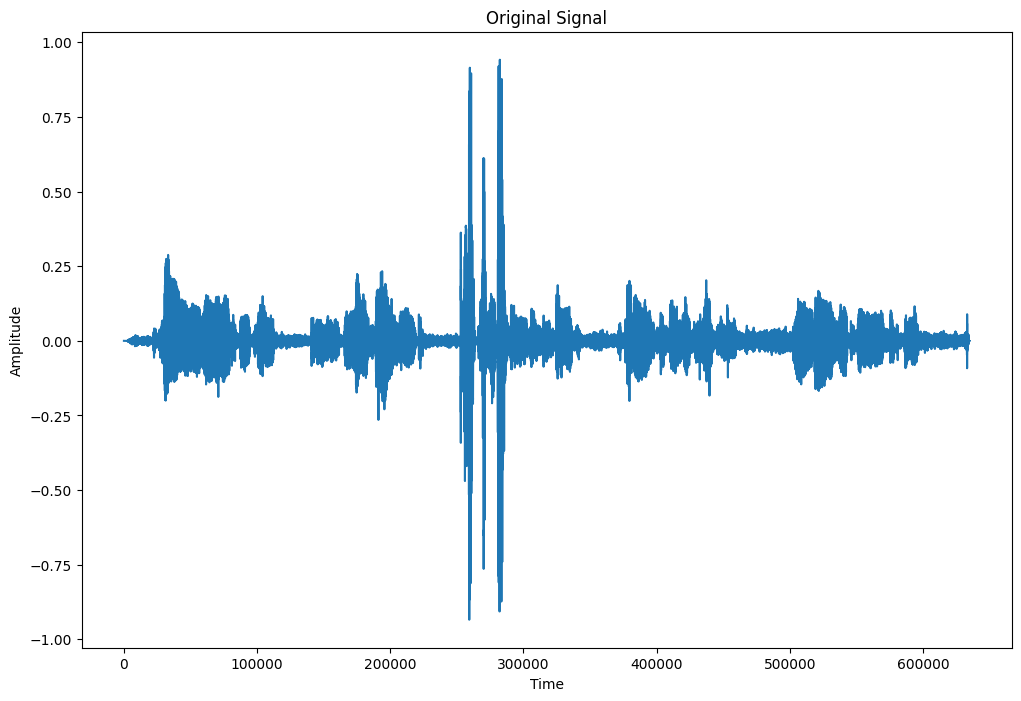

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(y_0)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [7]:
# Downsampling the signal to 8kHz
'''Designing an anti-aliasing filter'''
nyquist_rate = sr_0 / 2.0
cutoff_hz = 4.0  # Cutoff frequency of the filter
firr_coeffs = signal.firwin(numtaps=101, cutoff=cutoff_hz / nyquist_rate)  
y_0_filtered = signal.lfilter(firr_coeffs, 1.0, y_0)
y_8k = signal.decimate(y_0_filtered, int(sr_0 / 8000))
sr_8k = 8000

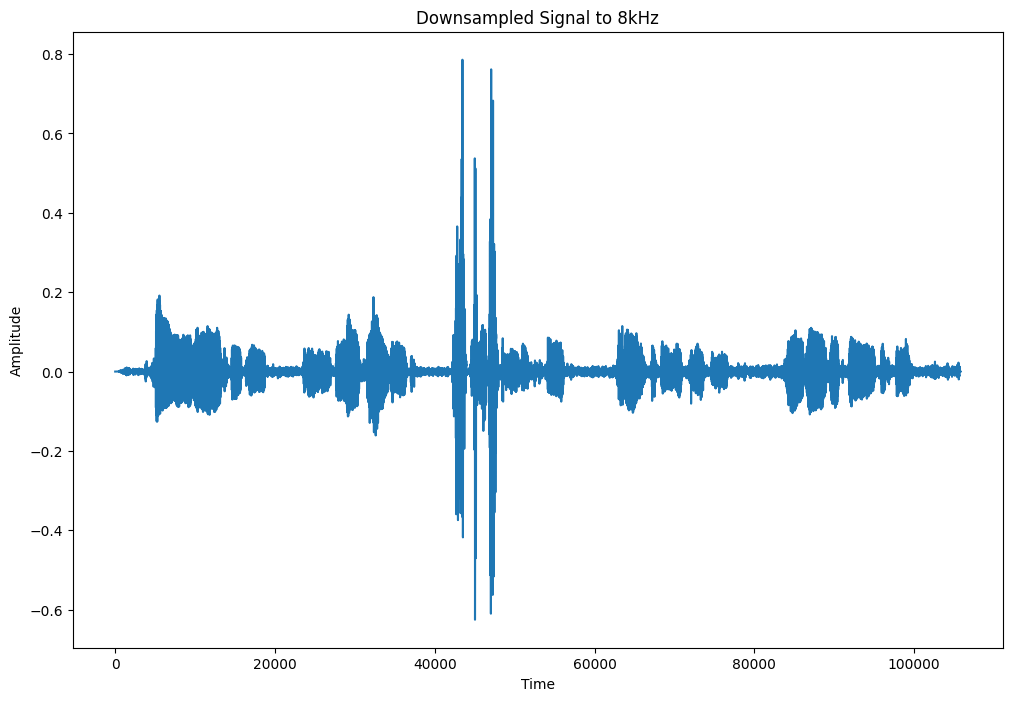

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(y_8k)
plt.title('Downsampled Signal to 8kHz')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

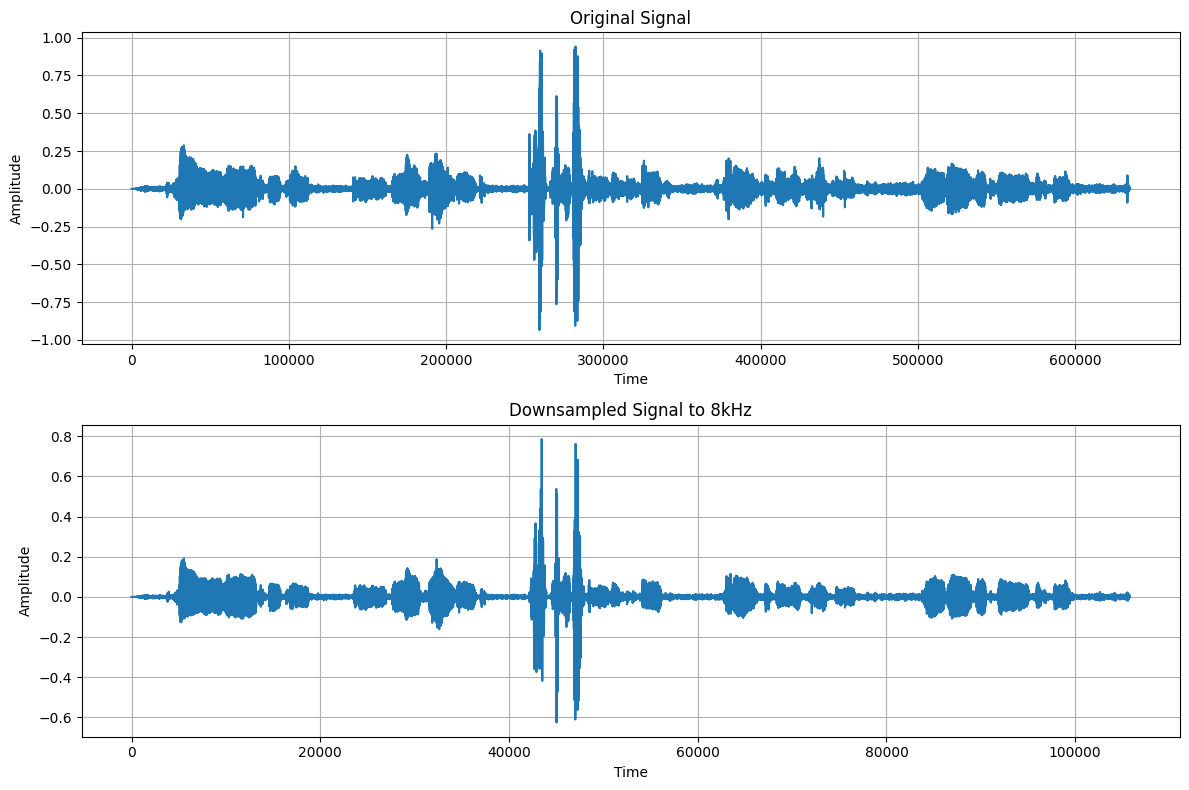

In [9]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(y_0)
plt.grid()
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(y_8k)
plt.grid()
plt.title('Downsampled Signal to 8kHz')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.tight_layout()